In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("Dataset\\OSX_DS_assignment.csv")

In [3]:
df.head()

user_name   country                                       review_title  \
0  @kerinokeefe     Italy                  Nicosia 2013 Vulkà Bianco  (Etna)   
1    @vossroger  Portugal      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2   @paulgwine         US      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           NaN        US  St. Julian 2013 Reserve Late Harvest Riesling ...   
4   @paulgwine         US  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

                                  review_description  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2               winery         variety  
0                 Etna                NaN              Nicosia     White Blend  
1                  NaN                NaN  Quinta dos Avidagos  Portuguese Red  
2    Willamette Valley  Willamette Valley            Rainstorm      Pinot Gris  
3  Lake Michigan Shore                NaN           St. Julian        Riesling  
4    Willamette Valley  Willamette Valley         Sweet Cheeks      Pinot Noir

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [5]:
df.shape

(103322, 12)

In [6]:
df.isnull().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

# Data Cleaning

In [7]:
# Dropping irrelevant columns
df = df.drop(['user_name', 'designation'], axis=1)

In [8]:
# Handling duplicate entries
df = df.drop_duplicates()

In [9]:
# Handling missing values

df = df.dropna(subset=['country','review_title'])

df["region_1"] = df["region_1"].fillna(df["region_1"].mode()[0])
df["region_2"] = df["region_2"].fillna(df["region_2"].mode()[0])

df["price"] = df["price"].fillna(int(df["price"].median()))

In [10]:
df["country"] = df["country"].replace({"Austria":"Australia"})

In [11]:
df.shape

(95419, 10)

In [12]:
df.isnull().sum()

country               0
review_title          0
review_description    0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

In [13]:
# Save the cleaned data to a new CSV file
df.to_csv('Dataset\\cleaned_wine_reviews.csv', index=False)

# Exploratory Data Analysis (EDA) 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [15]:

# Load the cleaned wine review data
df = pd.read_csv('dataset\\cleaned_wine_reviews.csv')
df.head(2)

country                                   review_title  \
0     Italy              Nicosia 2013 Vulkà Bianco  (Etna)   
1  Portugal  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

                                  review_description  points  price  \
0  Aromas include tropical fruit, broom, brimston...      87   27.0   
1  This is ripe and fruity, a wine that is smooth...      87   15.0   

            province     region_1       region_2               winery  \
0  Sicily & Sardinia         Etna  Central Coast              Nicosia   
1              Douro  Napa Valley  Central Coast  Quinta dos Avidagos   

          variety  
0     White Blend  
1  Portuguese Red

In [16]:
# Summary statistics
df.describe()

points         price
count  95419.000000  95419.000000
mean      88.538876     36.383456
std        3.144658     42.577780
min       80.000000      4.000000
25%       86.000000     18.000000
50%       88.000000     27.000000
75%       91.000000     44.000000
max      100.000000   3300.000000

In [17]:
# Distribution of wine varieties
variety_counts = df['variety'].value_counts().head(10)

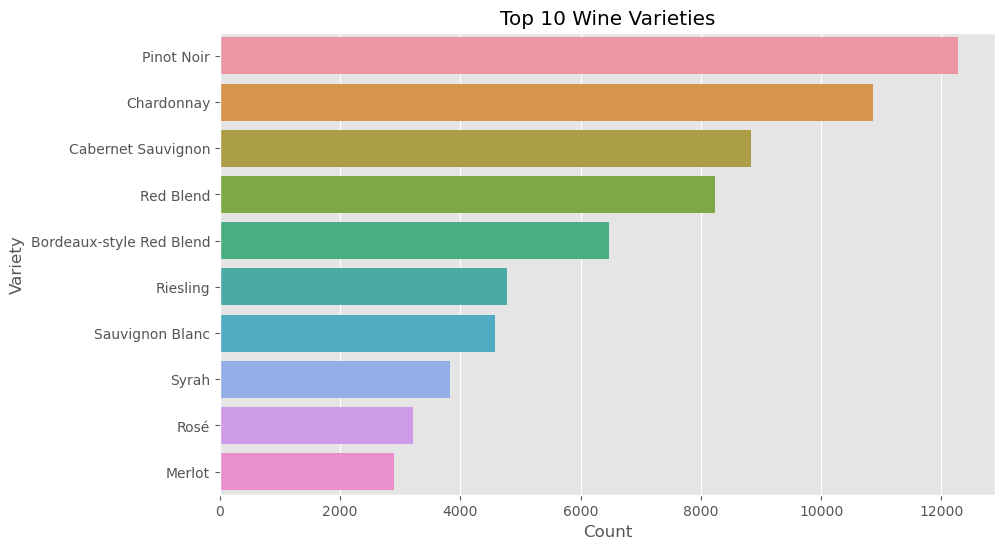

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=variety_counts.values, y=variety_counts.index)
plt.title('Top 10 Wine Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()

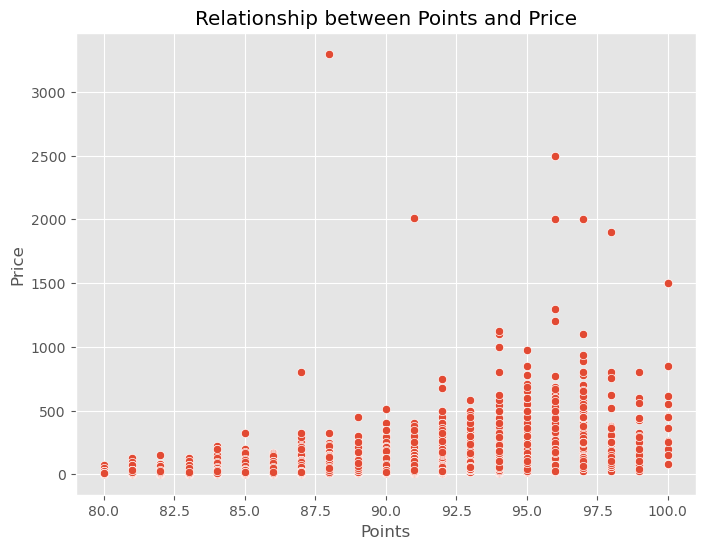

In [19]:
# Relationship between points and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='points', y='price', data=df)
plt.title('Relationship between Points and Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

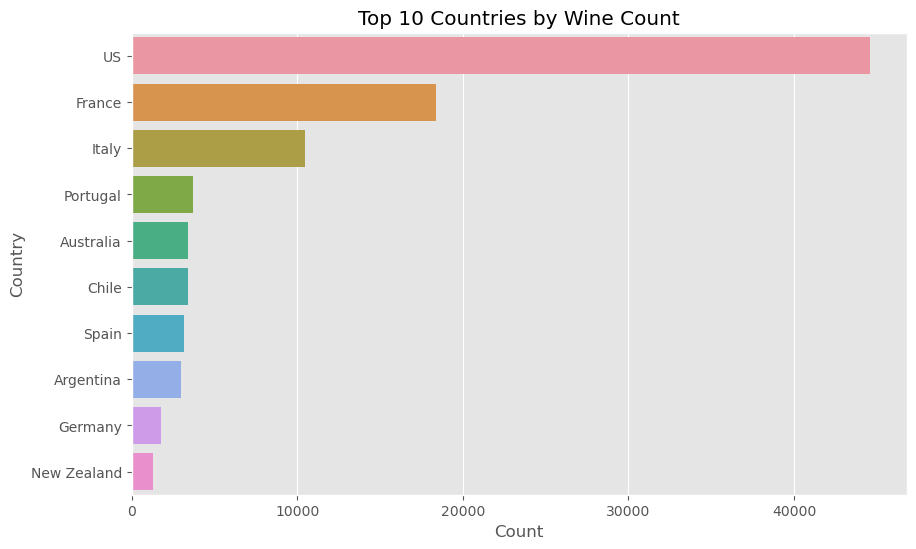

In [20]:
# Wine distribution by country
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Wine Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


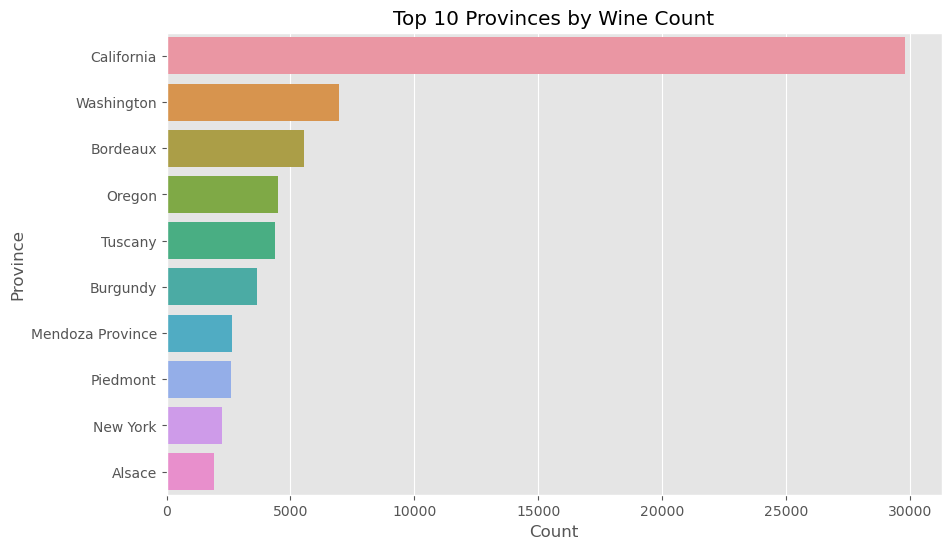

In [21]:
# Wine distribution by province
province_counts = df['province'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=province_counts.values, y=province_counts.index)
plt.title('Top 10 Provinces by Wine Count')
plt.xlabel('Count')
plt.ylabel('Province')
plt.show()


<AxesSubplot:>

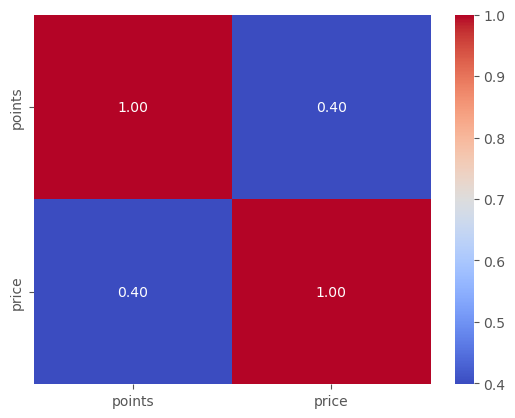

In [22]:
# Display correlation matrix of numerical columns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

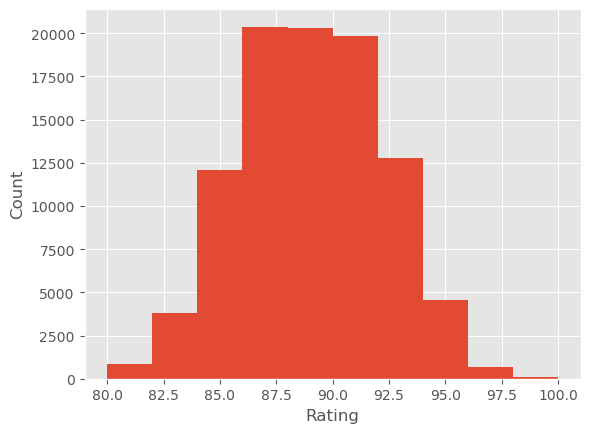

In [23]:
# Display distribution of ratings
plt.hist(df['points'], bins=10, range=(80, 100))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

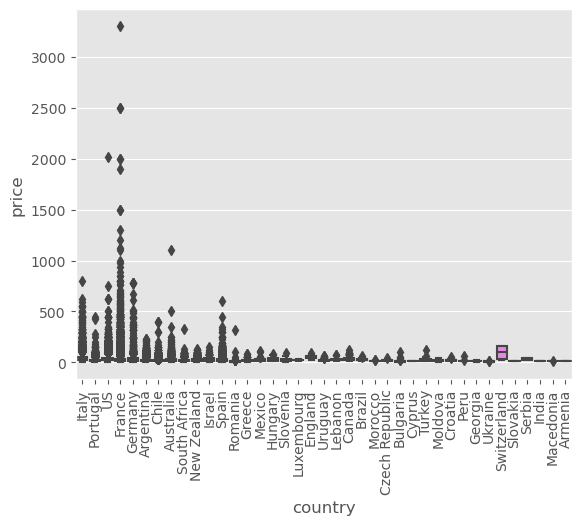

In [24]:
# Display boxplots of price by country and variety
sns.boxplot(x='country', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

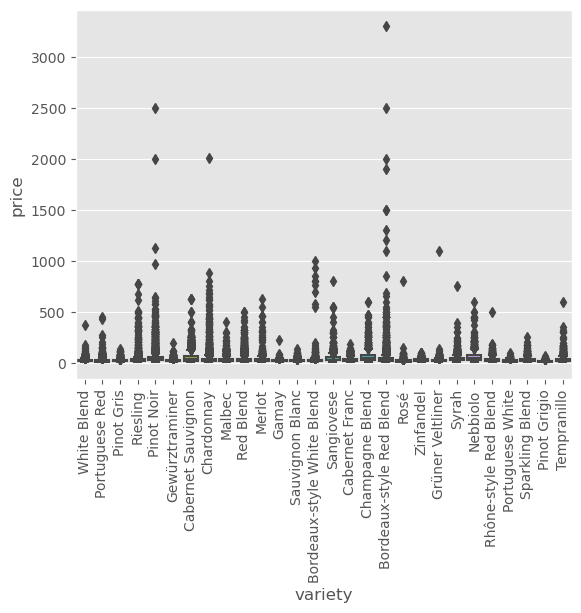

In [25]:
sns.boxplot(x='variety', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
#importing the Dependinces
from nltk.util import pr
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [28]:
#clean data set
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df['review_description'] = df['review_description'].apply(clean)

# To derive the top 5 actionable Insights from the Data

<h2>1. Identify the most popular wine varieties:</h2>
    <p>Analyze the frequency of different wine varieties mentioned in the reviews to determine which ones are most commonly purchased or reviewed by customers.<p>

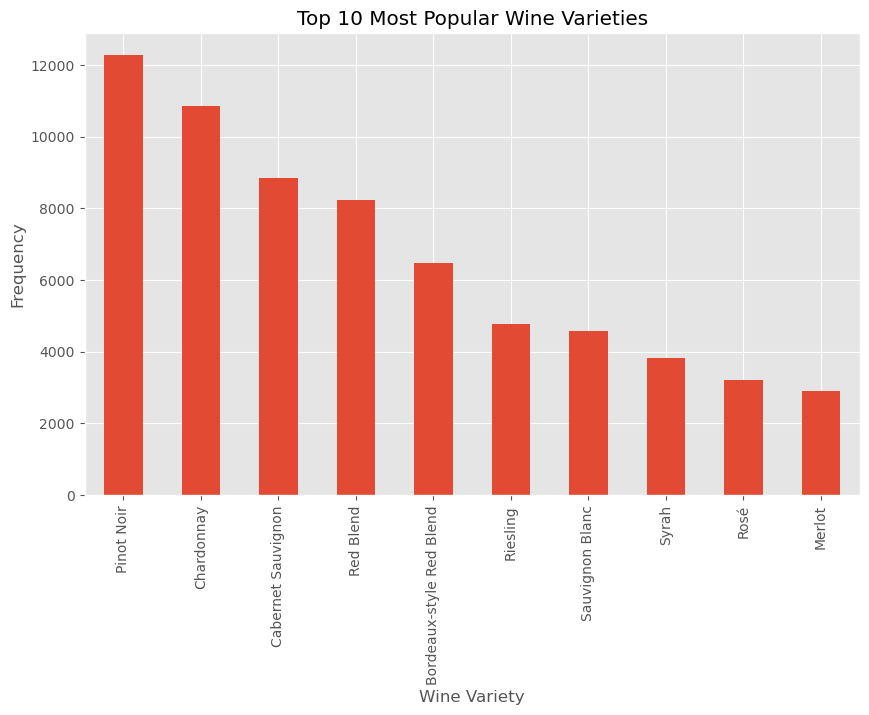

In [29]:
# Count the frequency of each wine variety
variety_counts = df['variety'].value_counts()

# Select the top N most frequent wine varieties
N = 10  # Set the desired number of top varieties to consider
top_varieties = variety_counts.head(N)

# Plot the top N most frequent wine varieties
plt.figure(figsize=(10, 6))
top_varieties.plot(kind='bar')
plt.xlabel('Wine Variety')
plt.ylabel('Frequency')
plt.title('Top {} Most Popular Wine Varieties'.format(N))
plt.xticks(rotation=90)
plt.show()


In [31]:
import plotly.express as px
fig = px.bar(top_varieties,title="Top 10 Most Popular Wine Varieties",
            labels={
                "index":"Wine Variety",
                "value":"Frequency"
            })
fig.write_image("wine_varieties.png")

 <h2>2.Discover key factors influencing customer satisfaction:</h2>
 <p> Perform sentiment analysis on the reviews and identify the aspects that are strongly correlated with positive or negative sentiment. For example, you might find that taste, price, or customer service significantly impact customer satisfaction<p>

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the review descriptions
sentiments = df['review_description'].apply(lambda x: sia.polarity_scores(x))


# Extract the compound sentiment scores
df['sentiment_score'] = [sentiment['compound'] for sentiment in sentiments]

# Categorize the sentiments as positive, negative, or neutral
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0.2 else 'negative' if score < -0.2 else 'neutral')

df['sentiment'].value_counts()

positive    70023
neutral     21442
negative     3954
Name: sentiment, dtype: int64

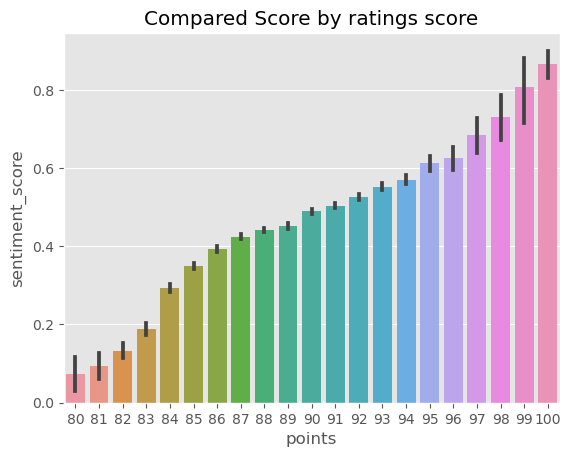

In [33]:
ax=sns.barplot(x="points",y="sentiment_score",data=df)
ax.set_title("Compared Score by ratings score")
plt.show()

In [34]:
import plotly.express as px

labels = df["sentiment"].value_counts()
numbers = labels.index
quantity = labels.values

fig = px.pie(df,values=quantity,names=numbers,hole=.5,title="customer satisfaction based on Reviews")
fig.show()

<h2>3.Price Optimization: </h2> <p> Analyze the relationship between wine prices and customer ratings (points) to identify the price ranges that offer the best value for customers. This insight can guide pricing strategies and help optimize the price-quality relationship for different wine varieties.

<p>

Price Range: Low
Mean Rating: 86.27
Median Rating: 86.00
Standard Deviation of Rating: 2.33

Price Range: Medium
Mean Rating: 88.76
Median Rating: 89.00
Standard Deviation of Rating: 2.75

Price Range: High
Mean Rating: 91.27
Median Rating: 92.00
Standard Deviation of Rating: 2.71

There is a significant difference in ratings between price ranges.


Text(0.5, 1.0, 'Price vs. Ratings ')

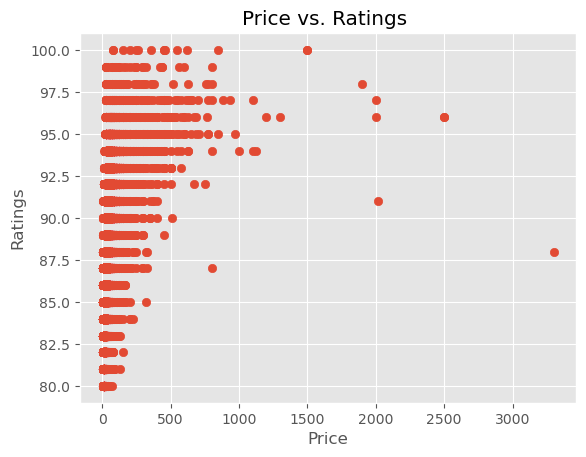

In [35]:

import scipy.stats as stats

# Price ranges
low_price_range = df[df['price'] < 20]
medium_price_range = df[(df['price'] >= 20) & (df['price'] < 50)]
high_price_range = df[df['price'] >= 50]

# Statistical analysis
price_ranges = ['Low', 'Medium', 'High']
ranges_data = [low_price_range, medium_price_range, high_price_range]

for price_range, data in zip(price_ranges, ranges_data):
    mean_rating = data['points'].mean()
    median_rating = data['points'].median()
    std_rating = data['points'].std()
    print(f"Price Range: {price_range}")
    print(f"Mean Rating: {mean_rating:.2f}")
    print(f"Median Rating: {median_rating:.2f}")
    print(f"Standard Deviation of Rating: {std_rating:.2f}")
    print()

# Hypothesis testing
low_rating = low_price_range['points']
medium_rating = medium_price_range['points']
high_rating = high_price_range['points']

p_value = stats.f_oneway(low_rating, medium_rating, high_rating).pvalue
if p_value < 0.05:
    print("There is a significant difference in ratings between price ranges.")
else:
    print("There is no significant difference in ratings between price ranges.")

# Visualize the relationship between price and ratings
plt.scatter(df['price'], df['points'])
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.title('Price vs. Ratings ')


<h2>4. Identify the most popular country:</h2>
    <p>Analyze the frequency of different Wine distribution by country mentioned in the dataset<p>

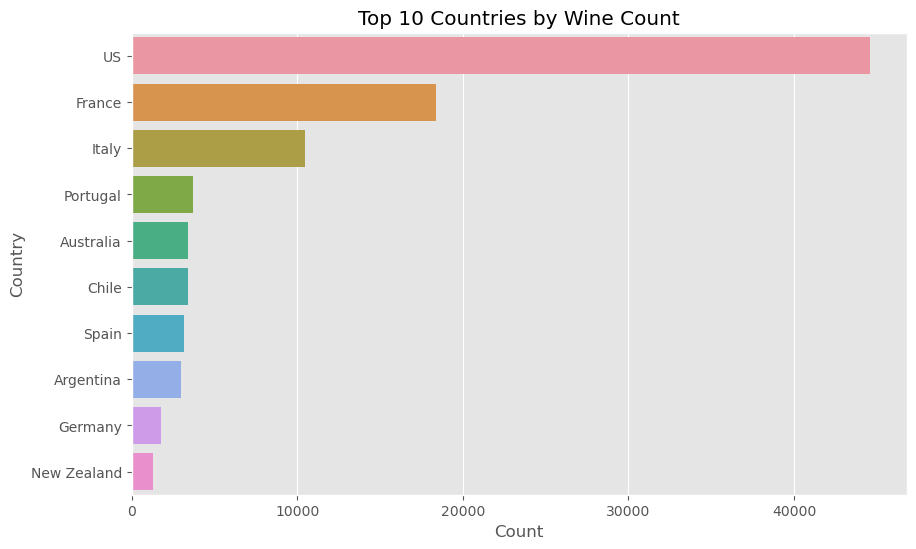

In [36]:
# Wine distribution by country
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Wine Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


In [37]:
fig = px.bar(x=country_counts.values, y=country_counts.index,title="Top 10 Countries by Wine Count",
            labels={
                "index":"Count",
                "value":"Country"
            })
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.write_image("Countries_Wine_Count.png")

<h2> 5. Regional Preferences::</h2> <p> Analyze the reviews to identify preferences for wines from specific regions or countries. Determine which regions or countries receive the most positive reviews and have a loyal customer base. This insight can aid in sourcing decisions, focusing on wines from popular regions, and targeting marketing efforts accordingly.
<p>

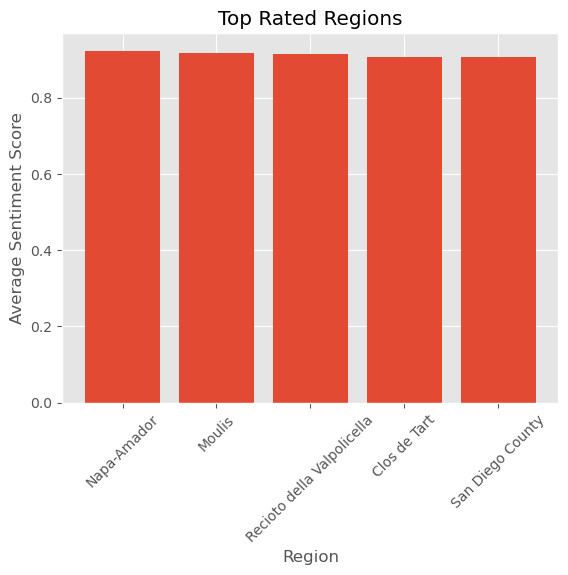

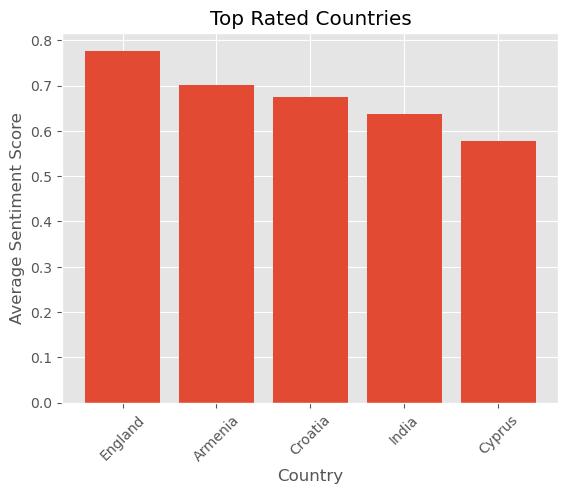

In [38]:

# Calculate average sentiment scores for each region
region_sentiment = df.groupby("region_1")['sentiment_score'].mean()

# Calculate average sentiment scores for each country
country_sentiment = df.groupby("country")['sentiment_score'].mean()

# Sort regions and countries based on average sentiment scores
top_regions = region_sentiment.sort_values(ascending=False).head(5)
top_countries = country_sentiment.sort_values(ascending=False).head(5)

# Plot the average sentiment scores for top regions
plt.bar(top_regions.index, top_regions.values)
plt.xlabel('Region')
plt.ylabel('Average Sentiment Score')
plt.title('Top Rated Regions')
plt.xticks(rotation=45)
plt.show()

# Plot the average sentiment scores for top countries
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.title('Top Rated Countries')
plt.xticks(rotation=45)
plt.show()


In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.review_description:
    
    # typecaste each val to string
    val = str(val)
    
    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)




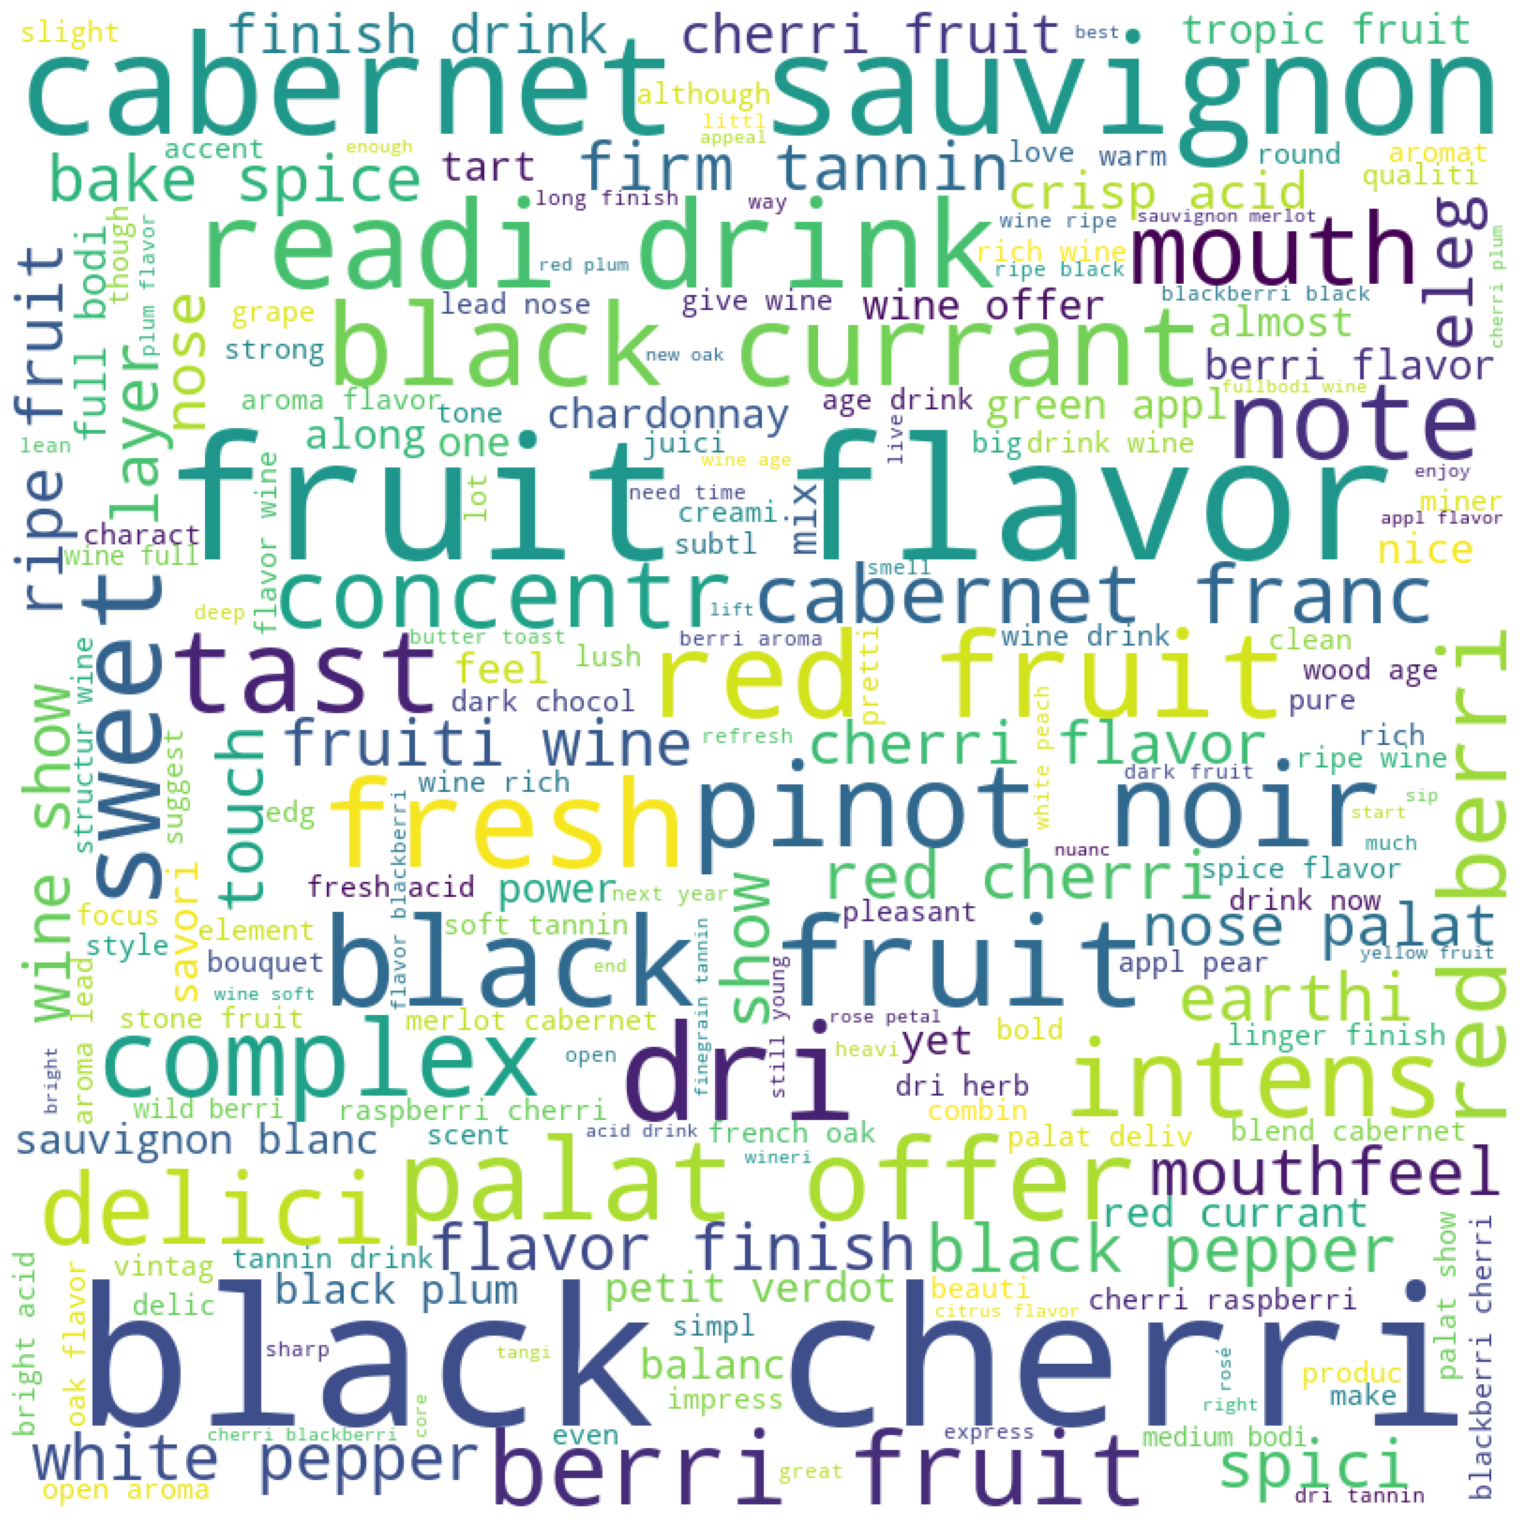

In [40]:
plt.figure(figsize = (20,15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Building a Predictive Model for Wine Variety Prediction:

<h2> Data Preprocessing</h2>

In [41]:
df["variety"].value_counts().head(5)

Pinot Noir                  12275
Chardonnay                  10865
Cabernet Sauvignon           8838
Red Blend                    8233
Bordeaux-style Red Blend     6471
Name: variety, dtype: int64

In [42]:
rows = ["Pinot Noir","Chardonnay","Cabernet Sauvignon","Red Blend"]
df = df[df["variety"].isin(rows)]

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

var = ["sentiment","variety","country"]

for i in var:
    encoder.fit(df[i])
    df[i] = encoder.transform(df[i])
    mapping = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
    print(i,":",mapping)

sentiment : {'negative': 0, 'neutral': 1, 'positive': 2}
variety : {'Cabernet Sauvignon': 0, 'Chardonnay': 1, 'Pinot Noir': 2, 'Red Blend': 3}
country : {'Argentina': 0, 'Australia': 1, 'Brazil': 2, 'Bulgaria': 3, 'Canada': 4, 'Chile': 5, 'Croatia': 6, 'Cyprus': 7, 'Czech Republic': 8, 'England': 9, 'France': 10, 'Georgia': 11, 'Germany': 12, 'Greece': 13, 'Hungary': 14, 'Israel': 15, 'Italy': 16, 'Lebanon': 17, 'Macedonia': 18, 'Mexico': 19, 'Moldova': 20, 'Morocco': 21, 'New Zealand': 22, 'Peru': 23, 'Portugal': 24, 'Romania': 25, 'Serbia': 26, 'Slovenia': 27, 'South Africa': 28, 'Spain': 29, 'Switzerland': 30, 'Turkey': 31, 'US': 32, 'Ukraine': 33, 'Uruguay': 34}


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

var=["points","price"]

for i in var:
    df[[i]] = scaler.fit_transform(df[[i]])

In [45]:
columns = ["country","points","price","sentiment"]
X = df[columns]
y=df["variety"]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=.25)

<h2>Machine Learning Algorithm Choosing</h2>

In [47]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
ans1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans1)
print(score*100)


48.821247388839154


In [48]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
ans2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans2)
print(score*100)


49.567293345270066


In [49]:
from sklearn.svm import SVC

model3 = SVC()
model3.fit(X_train,y_train)
ans3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans3)
print(score*100)


42.395304884114196


In [50]:
from xgboost import XGBClassifier

model4 = XGBClassifier()
model4.fit(X_train,y_train)
ans4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans4)
print(score*100)


52.59126628867005


In [51]:
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression()
model5.fit(X_train,y_train)
model5.score(X_test,y_test)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.3539242017308266

In [52]:
from sklearn.naive_bayes import MultinomialNB
model6 = MultinomialNB()
model6.fit(X_train,y_train)
ans6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,ans6)
print(score*100)

33.940117377897145


In [53]:
import joblib
joblib.dump(model4,r"model.pkl")

['model.pkl']

<h2>predictive System</h2>

In [54]:
#predictive System

mapping=[
    {'Argentina': 0, 'Australia': 1, 'Brazil': 2, 'Bulgaria': 3, 'Canada': 4, 'Chile': 5, 'Croatia': 6, 'Cyprus': 7,
     'Czech Republic': 8, 'England': 9, 'France': 10, 'Georgia': 11, 'Germany': 12, 'Greece': 13, 'Hungary': 14, 
     'Israel': 15, 'Italy': 16, 'Lebanon': 17, 'Macedonia': 18, 'Mexico': 19, 'Moldova': 20, 'Morocco': 21, 'New Zealand': 22,
     'Peru': 23, 'Portugal': 24, 'Romania': 25, 'Serbia': 26, 'Slovenia': 27, 'South Africa': 28, 'Spain': 29, 
     'Switzerland': 30, 'Turkey': 31, 'US': 32, 'Ukraine': 33, 'Uruguay': 34},
    {},
    {},
    {'negative': 0, 'neutral': 1, 'positive': 2},
    {'Cabernet Sauvignon': 0, 'Chardonnay': 1, 'Pinot Noir': 2, 'Red Blend': 3}
]

columns = ["Enter the country that the wine is from? ","What range to be in want(0-100)? ","Your Afforbale Price ","negative/neutral/positive: "]

data = []  #data = [29,100,556,2]

for i in range(4):
    input_data = input(columns[i])
    if i==0 or i==3:
        input_data = mapping[i][input_data]
    data.append(int(input_data))
    
    
data=np.array(data).reshape(1,-1)
result = model4.predict(data)
print()
if result==0:
    print("the Wine Variety is: Cabernet Sauvignon")
elif result==1:
    print("the Wine Variety is: Chardonnay")
elif result==2:
    print("the Wine Variety is: Pinot Noir")
else:
    print("the Wine Variety is: Red Blend")

Enter the country that the wine is from? US
What range to be in want(0-100)? 33
Your Afforbale Price 54
negative/neutral/positive: positive

the Wine Variety is: Cabernet Sauvignon


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset\\cleaned_wine_reviews.csv')

x=df["review_description"]
y=df["variety"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

vectorizer = TfidfVectorizer()
x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [57]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_transformed,y_train)

y_pred = rf_classifier.predict(x_test_transformed)

In [58]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100 : .2f}%")

Accuracy:  88.81%


In [59]:
ans=np.array(["Much like the regular bottling from 2012, "],dtype="O")
ans = vectorizer.transform(ans)

rf_classifier.predict(ans)

array([1])

In [60]:
import joblib
joblib.dump(rf_classifier,r"TfidfVectorizer_model.pkl")

['TfidfVectorizer_model.pkl']